In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install konlpy

In [3]:
%%shell
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graph

In [4]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [5]:
%%shell
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141804 sha256=f934da857b49b4f043a195d6c619c735b9d33dde5c3d655a38effddb65ced1be
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
  

In [6]:
path = '/content/drive/MyDrive/DL/AtoZ/data/NSMC'

%cd '{path}'
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

/content/drive/MyDrive/DL/AtoZ/data/NSMC
--2022-02-15 06:16:58--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14628807 (14M) [text/plain]
Saving to: ‘ratings_train.txt.1’

ratings_train.txt.1 100%[===================>]  13.95M  36.4MB/s    in 0.4s    

2022-02-15 06:16:58 (36.4 MB/s) - ‘ratings_train.txt.1’ saved [14628807/14628807]

--2022-02-15 06:16:58--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200

# NSMC 정제

In [7]:
def read_documents(filename):
  with open(filename, encoding='utf-8') as f:
    documents = [line.split('\t') for line in f.read().splitlines()]
    documents = documents[1:]

  return documents

In [8]:
train_docs = read_documents('/content/drive/MyDrive/DL/AtoZ/data/NSMC/ratings_train.txt')
test_docs = read_documents('/content/drive/MyDrive/DL/AtoZ/data/NSMC/ratings_test.txt')

In [9]:
print(len(train_docs))
print(len(test_docs))

150000
50000


## 함수 정의

In [10]:
def text_cleaning(doc):
  doc = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', doc)
  return doc

def define_stopwrds(path):

  SW = set()
  with open(path) as f:
    for word in f:
      SW.add(word)

  return SW

def text_tokenizing(doc):
  return [word for word in mecab.morphs(doc) if word not in SW and len(word) > 1]

## 토크나이징

In [11]:
from konlpy.tag import Mecab
import json
import os
import re
from pprint import pprint

In [12]:
mecab = Mecab()

In [13]:
SW = define_stopwrds('/content/drive/MyDrive/DL/AtoZ/data/stopwords-ko.txt')

In [16]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn'):
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn', 'w', encoding='utf-8') as f:
    train_data = json.load(f)
else:
  train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
  with open("/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn", 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent='\t')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn'):
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn', 'w', encoding='utf-8') as f:
   test_data = json.load(f)

else:
  test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent='\t')

In [17]:
pprint(train_data[0])
pprint(test_data[0])

(['진짜', '짜증', '네요', '목소리'], '0')
(['GDNTOPCLASSINTHECLUB'], '0')


# NITK 이용한 histogram 분석

In [18]:
import nltk

total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

1206842


In [19]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

51722
[('영화', 57614),
 ('..', 22813),
 ('는데', 11543),
 ('너무', 11002),
 ('정말', 9783),
 ('으로', 9322),
 ('네요', 9053),
 ('재밌', 9022),
 ('지만', 8366),
 ('진짜', 8326)]


## histogram 그리기

In [20]:
import matplotlib.pyplot as plt
import platform

In [21]:
from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-docu

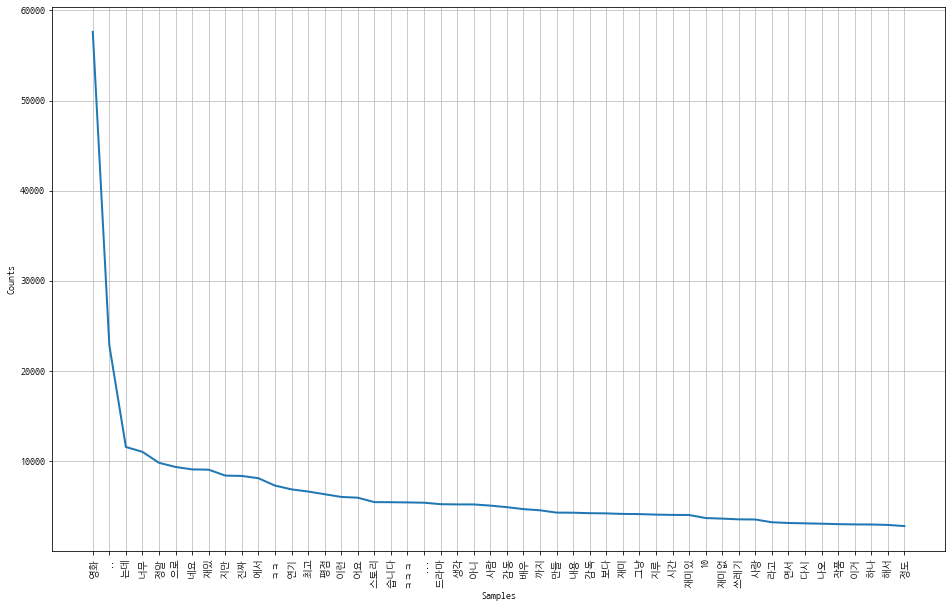

In [22]:
plt.figure(figsize=(16, 10))
text.plot(50)

## WordColud 그리기

In [23]:
!pip install wordcloud

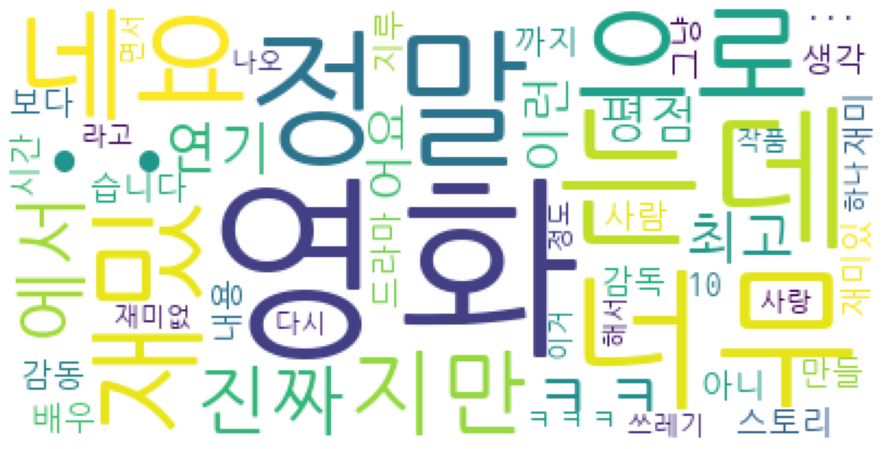

In [24]:
from wordcloud import WordCloud

data = text.vocab().most_common(50)

path = '/user/share/fonts/truetype/nanum/NanumGothicCoding.ttf'
wordcloud = WordCloud(font_path=path,
                      relative_scaling=0.2,
                      background_color='white'
                      ).generate_from_frequencies(dict(data))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud)
plt.axis('off') 
plt.show()

# 일반적으로 워드클라우드는 형태소 분석보단 명사 분석을 활용

# scikit-learn으로 NSMC 감정분석

In [25]:
if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn'):
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn', 'w', encoding='utf-8') as f:
    train_data = json.load(f)
else:
  train_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in train_docs if text_tokenizing(text_cleaning(line[1]))]
  with open("/content/drive/MyDrive/DL/AtoZ/data/NSMC/train_docs.josn", 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent='\t')

if os.path.exists('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn'):
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn', 'w', encoding='utf-8') as f:
   test_data = json.load(f)
else:
  test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(text_cleaning(line[1]))]
  with open('/content/drive/MyDrive/DL/AtoZ/data/NSMC/test_docs.josn', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent='\t')

In [26]:
pprint(train_data[0])
pprint(test_data[0])

(['진짜', '짜증', '네요', '목소리'], '0')
(['평점', '나쁘', '지만', '짜리', '더더욱', '아니', '잖아'], '0')


In [27]:
# 제거된 데이터 수
print(len(train_docs) - len(train_data))
print(len(test_docs) - len(test_data))

3531
1124


In [28]:
total_tokens = [token for doc in train_data for token in doc[0]]
print(len(total_tokens))

1138353


In [29]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

48022
[('영화', 57601),
 ('는데', 11464),
 ('너무', 11013),
 ('정말', 9779),
 ('으로', 9314),
 ('재밌', 8988),
 ('네요', 8979),
 ('지만', 8654),
 ('진짜', 8327),
 ('에서', 8064)]


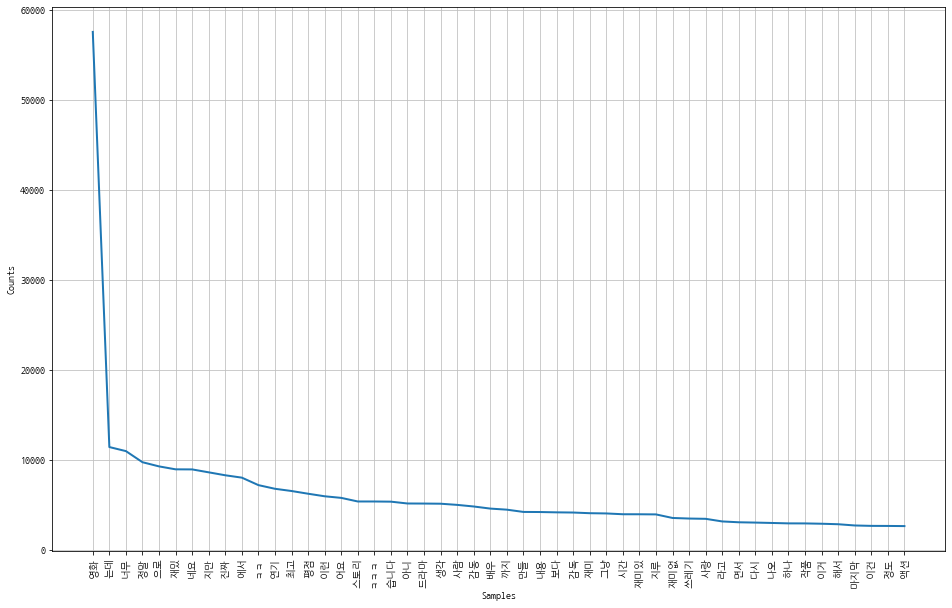

In [30]:
plt.figure(figsize=(16, 10))
text.plot(50)

In [31]:
# 여러 리스트를 하나로 묶어주는 함수
def list_to_str(List):
  return " ".join(List)

## Linear Classifier와 Support Vector Machine으로 nsmc 분류

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import numpy as np

In [33]:
train_x = [list_to_str(doc) for doc, _ in train_data]
test_x = [list_to_str(doc) for doc, _ in test_data]
train_y = [label for _, label in train_data]
test_y = [label for _, label in test_data]

### Perceptron linear classifier

In [34]:
learner1 = Pipeline([
                    ('vect', CountVectorizer()),
                    ('clf', SGDClassifier(loss='perceptron', penalty='l2', alpha=1e-4, random_state=42, max_iter=100))
])

In [35]:
classifier = learner1

classifier.fit(train_x, train_y)
train_predict = classifier.predict(train_x)
train_accuracy = np.mean(train_predict == train_y)

test_predict = classifier.predict(test_x)
test_accuracy = np.mean(test_predict == test_y)

print(f'For {len(test_x)} test data')
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

For 48876 test data
Training Accuracy: 0.8471
Test Accuracy: 0.7775


### SVM

In [36]:
learner2 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('clf', SVC(kernel='linear'))
]) 

In [37]:
learner3 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('clf', SVC(kernel='poly', degree=8))
])

In [38]:
learner4 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('clf',SVC(kernel='rbf'))
])

In [43]:
learner5 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('clf', SVC(kernel='sigmoid'))
])

### Naive Bayes Classifier

In [45]:
learner6 = Pipeline([
                     ('vect', CountVectorizer()),
                     ('clf', MultinomialNB())
])

# 딥러닝으로 NSMC 감정분석

In [52]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential

## Set Hyperparameter

In [53]:
max_words = 35000
max_len = 30
batch_size = 128
EPOCHS = 4

## Define Network Structure

In [62]:
class SimpleLSM(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.emb = Embedding(max_words, 100)
    self.lstm = LSTM(128, dropout=0.2, recurrent_dropout=0.2)
    self.dense = Dense(1, activation='sigmoid')

  def __call__(self, x, training=None, mask=None):
    x = self.emb(x)
    x = self.lstm(x)
    return self.dense(x)

## Data Preprocessing

In [61]:
x_train = [doc for doc, _ in train_data]

# Tokenizing
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences([doc for doc, _ in test_data])
y_train = np.array([int(label) for _, label in train_data])
y_test = np.array([int(label) for _, label in test_data])
print(x_train[0])

# zero padding
x_train = pad_sequences(x_train, value=0, padding='pre', maxlen=max_len)
x_test = pad_sequences(x_test, value=0, padding='pre', maxlen=max_len)
print('\n', x_train[0])

# 학습 가능한 형태로 최종 변환
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(batch_size)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

[9, 110, 7, 456]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 110   7 456]


## Modeling

In [67]:
model = SimpleLSM()

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [69]:
history = model.fit(train_ds, validation_data=test_ds, epochs=EPOCHS, callbacks=[earlystopper])

Epoch 1/4
1145/1145 [==============================] - 146s 124ms/step - loss: 0.4135 - accuracy: 0.8064 - val_loss: 0.3892 - val_accuracy: 0.8233
Epoch 2/4
1145/1145 [==============================] - 141s 123ms/step - loss: 0.3264 - accuracy: 0.8557 - val_loss: 0.3927 - val_accuracy: 0.8252
Epoch 3/4
1145/1145 [==============================] - 134s 117ms/step - loss: 0.2725 - accuracy: 0.8828 - val_loss: 0.4212 - val_accuracy: 0.8208
Epoch 4/4
1145/1145 [==============================] - 153s 134ms/step - loss: 0.2231 - accuracy: 0.9052 - val_loss: 0.4907 - val_accuracy: 0.8143


In [70]:
model.evaluate(x_test, y_test, batch_size=batch_size)

1528/1528 [==============================] - 24s 16ms/step - loss: 0.4907 - accuracy: 0.8143


[0.4906758666038513, 0.8143464922904968]

## Loss Visualization

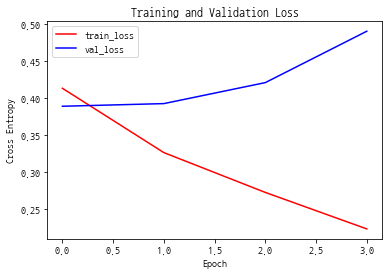

In [73]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'r', label='train_loss')
plt.plot(val_loss, 'b', label='val_loss')
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.title('Training and Validation Loss')
plt.show()

## Save Weight

In [74]:
model.save_weights('nsmc_keras_simplelstm')